#### Recreate Figure 3 in Gandhi, P. J., et al. (2022)

@author: Pratik Gandhi <pjgandhi@ucdavis.edu>

In [1]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

In [2]:
# setting matplotlib parameters to make plots look more nicer
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['figure.figsize'] = (8, 7.5)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.size'] = 25.0
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 25.0
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['axes.titlepad'] = 0.0
plt.rcParams['axes.titlesize'] = 25.0
plt.rcParams['axes.formatter.limits'] = -7,7
plt.rcParams['xtick.major.size'] = 15.0
plt.rcParams['ytick.major.size'] = 15.0
plt.rcParams['xtick.minor.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 8.0
plt.rcParams['xtick.major.pad'] = 12.0
plt.rcParams['ytick.major.pad'] = 12.0
plt.rcParams['xtick.minor.pad'] = 12.0
plt.rcParams['ytick.minor.pad'] = 12.0
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.constrained_layout.use'] = False

#### handling i/o; reading in data along with some manipulations

In [3]:
# reading in DES data shared with us (Baldry+12 SMF)
DES = ascii.read('../data/SNrates_DES_Wiseman21_norm10.txt')
DES_mass = DES['stellarMass']
DES_specRate = DES['specRate']
DES_uperr = DES['specRateErrUp']
DES_lowerr = DES['specRateErrLow']
DES_sigmaUp = np.array(DES_uperr) - np.array(DES_specRate)
DES_sigmaLow = np.array(DES_specRate) - np.array(DES_lowerr)

In [4]:
# reading in asas-sn volume-limited data (Bell+03 SMF) with errors
asassnVL = ascii.read('../data/asassn_vollim_OG.txt')
asassnVL_mass = np.array(asassnVL['massBin'])
asassnVL_mass = np.power(10, asassnVL_mass)
asassnVL_rate = np.array(asassnVL['relRate'])
low_errVL = np.array(asassnVL['relRateErrLow'])
up_errVL = np.array(asassnVL['relRateErrUp'])

In [5]:
# reading in asas-sn volume-limited upper limits
asassnVL_uplim = ascii.read('../data/asassn_vollim_OG_uplims.txt')
asassnVL_uplim_mass = np.array(asassnVL_uplim['massBin'])
asassnVL_uplim_mass = np.power(10, asassnVL_uplim_mass)
asassnVL_uplim_uperr = np.array(asassnVL_uplim['relRateErrUp'])
asassnVL_uplim_uplims = np.array(['1, 1, 1'], dtype='bool')
asassnVL_uplim_yerr = 125

In [6]:
# reading in asas-sn full-volume data (Bell+03 SMF) with errors
asassnFV = ascii.read('../data/asassn_fullvol_OG.txt')
asassnFV_mass = np.array(asassnFV['massBin'])
asassnFV_mass = np.power(10, asassnFV_mass)
asassnFV_rate = np.array(asassnFV['relRate'])
low_errFV = np.array(asassnFV['relRateErrLow'])
up_errFV = np.array(asassnFV['relRateErrUp'])

In [7]:
# reading in asas-sn full-volume upper limits
asassnFV_uplim = ascii.read('../data/asassn_fullvol_OG_uplims.txt')
asassnFV_uplim_mass = np.array(asassnFV_uplim['massBin'])
asassnFV_uplim_mass = np.power(10, asassnFV_uplim_mass)
asassnFV_uplim_uperr = np.array(asassnFV_uplim['relRateErrUp'])
asassnFV_uplim_uplims = np.array(['1, 1'], dtype='bool')
asassnFV_uplim_yerr = 50

In [8]:
# reading in asas-sn volume-limited data modified to Baldry+12 SMF
asassnVL_B12 = ascii.read('../data/asassn_vollim_mod.txt')
asassnVL_B12_mass = np.array(asassnVL_B12['massBin'])
asassnVL_B12_mass = np.power(10, asassnVL_B12_mass)
asassnVL_B12_rate = np.array(asassnVL_B12['relRate'])
low_errVL_B12 = np.array(asassnVL_B12['relRateErrLow'])
up_errVL_B12 = np.array(asassnVL_B12['relRateErrUp'])

In [9]:
# reading in asas-sn volume-limited upper limits modified to Baldry+12 SMF
asassnVL_B12_uplim = ascii.read('../data/asassn_vollim_mod_uplims.txt')
asassnVL_B12_uplim_mass = np.array(asassnVL_B12_uplim['massBin'])
asassnVL_B12_uplim_mass = np.power(10, asassnVL_B12_uplim_mass)
asassnVL_B12_uplim_uperr = np.array(asassnVL_B12_uplim['relRateErrUp'])
asassnVL_B12_uplim_uplims = np.array(['1, 1, 1'], dtype='bool')
asassnVL_B12_uplim_yerr = 17.5

In [10]:
# reading in asas-sn full-volume data modified to Baldry+12 SMF
asassnFV_B12 = ascii.read('../data/asassn_fullvol_mod.txt')
asassnFV_B12_mass = np.array(asassnFV_B12['massBin'])
asassnFV_B12_mass = np.power(10, asassnFV_B12_mass)
asassnFV_B12_rate = np.array(asassnFV_B12['relRate'])
low_errFV_B12 = np.array(asassnFV_B12['relRateErrLow'])
up_errFV_B12 = np.array(asassnFV_B12['relRateErrUp'])

In [11]:
# reading in asas-sn full-volume upper limits modified to Baldry+12 SMF
asassnFV_B12_uplim = ascii.read('../data/asassn_fullvol_mod_uplims.txt')
asassnFV_B12_uplim_mass = np.array(asassnFV_B12_uplim['massBin'])
asassnFV_B12_uplim_mass = np.power(10, asassnFV_B12_uplim_mass)
asassnFV_B12_uplim_uperr = np.array(asassnFV_B12_uplim['relRateErrUp'])
asassnFV_B12_uplim_uplims = np.array(['1, 1, 1'], dtype='bool')
asassnFV_B12_uplim_yerr = 7

In [12]:
# reading in values for contours encompassing the full spread of Ia rates
contours = ascii.read('../data/SNrates_contours_complete.txt')
contour_mass = contours['stellarMass']
contour_low = contours['low']
contour_high = contours['high']

#### plot 1: comparing all observational samples -- DES, ASAS-SN based on Bell+03 SMF (FV and VL) and ASAS-SN renormalised to Baldry+12 SMF (FV and VL)

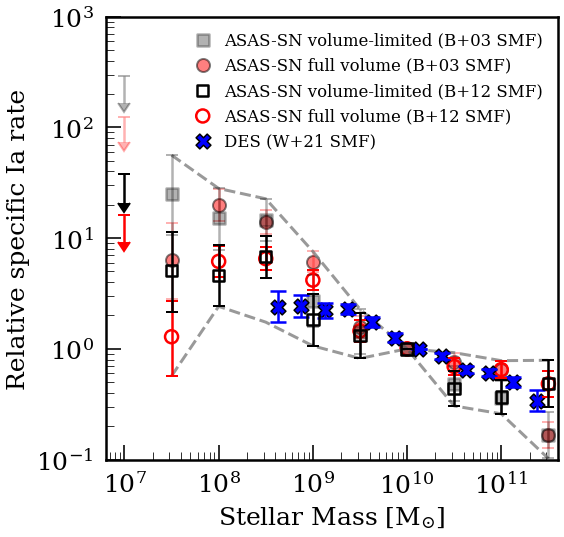

<Figure size 576x540 with 0 Axes>

In [14]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.175, right=0.96, top=0.97, bottom=0.15, wspace=0)

# plotting asassn (Bell+03 SMF) volume-limited data points with error bars (normalised)
ax.scatter(asassnVL_mass, asassnVL_rate, marker='s', s=130, c='k', \
           edgecolors='k', linewidths=2.5, label='ASAS-SN volume-limited (B+03 SMF)', 
           zorder=10, alpha=0.3)
ax.errorbar(asassnVL_mass, asassnVL_rate, yerr=(asassnVL_rate-low_errVL,
                                                up_errVL-asassnVL_rate), 
            fmt='none', ecolor='k', capsize=6.0, capthick=2.0, zorder=10, 
            label=None, alpha=0.3)

# plotting asassn (Bell+03 SMF) volume-limited upper limits
ax.errorbar(asassnVL_uplim_mass, asassnVL_uplim_uperr, yerr=asassnVL_uplim_yerr, 
            uplims=asassnVL_uplim_uplims, fmt='none', \
            ecolor='k', zorder=10, capsize=6.0, capthick=2.0, label=None, alpha=0.3)

# plotting asassn (Bell+03 SMF) full-volume data points with error bars (normalised)
ax.scatter(asassnFV_mass, asassnFV_rate, marker='o', s=170, c='r', \
           edgecolors='k', linewidths=2, label='ASAS-SN full volume (B+03 SMF)', 
           zorder=1, alpha=0.5)
ax.errorbar(asassnFV_mass, asassnFV_rate, yerr=(asassnFV_rate-low_errFV,
                                                up_errFV-asassnFV_rate), 
            fmt='none', ecolor='r', capsize=6.0, capthick=2.0, zorder=1, 
            label=None, alpha=0.3)

# plotting asassn (Bell+03 SMF) full-volume upper limits
ax.errorbar(asassnFV_uplim_mass, asassnFV_uplim_uperr, yerr=asassnFV_uplim_yerr, 
            uplims=asassnFV_uplim_uplims, fmt='none', \
            ecolor='r', zorder=1, capsize=6.0, capthick=2.0, label=None, alpha=0.3)

# plotting asassn (Baldry+12 SMF) volume-limited data points with error bars (normalised)
ax.scatter(asassnVL_B12_mass, asassnVL_B12_rate, marker='s', s=130, facecolor='none', \
           edgecolors='k', linewidths=2.5, label='ASAS-SN volume-limited (B+12 SMF)', 
           zorder=10000, alpha=1)
ax.errorbar(asassnVL_B12_mass, asassnVL_B12_rate, yerr=(asassnVL_B12_rate-low_errVL_B12,
                                                    up_errVL_B12-asassnVL_B12_rate), 
            fmt='none', ecolor='k', capsize=6.0, capthick=2.0, zorder=10000, 
            label=None, alpha=1)

# plotting asassn (Baldry+12 SMF) volume-limited upper limits
ax.errorbar(asassnVL_B12_uplim_mass, asassnVL_B12_uplim_uperr, 
            yerr=asassnVL_B12_uplim_yerr, uplims=asassnVL_B12_uplim_uplims, fmt='none', 
            ecolor='k', zorder=10, capsize=6.0, capthick=2.0, label=None, alpha=1)

# plotting asassn (Baldry+12 SMF) full-volume data points with error bars (normalised)
ax.scatter(asassnFV_B12_mass, asassnFV_B12_rate, marker='o', s=170, facecolor='none', \
           edgecolors='r', linewidths=2.5, label='ASAS-SN full volume (B+12 SMF)', 
           zorder=1, alpha=1)
ax.errorbar(asassnFV_B12_mass, asassnFV_B12_rate, yerr=(asassnFV_B12_rate-low_errFV_B12,
                                                        up_errFV_B12-asassnFV_B12_rate), 
            fmt='none', ecolor='r', capsize=6.0, capthick=2.0, zorder=1000, 
            label=None, alpha=1)

# plotting asassn (Baldry+12 SMF) full-volume upper limits
ax.errorbar(asassnFV_B12_uplim_mass, asassnFV_B12_uplim_uperr, 
            yerr=asassnFV_B12_uplim_yerr, uplims=asassnFV_B12_uplim_uplims, fmt='none', 
            ecolor='r', zorder=1000, capsize=6.0, capthick=2.0, label=None, alpha=1)

# plotting DES sample normalised to 10^10Msun
ax.scatter(DES_mass, DES_specRate, marker='X', s=220, c='blue', linewidths=1.5, 
           edgecolors='k', alpha=1, zorder=100, label='DES (W+21 SMF)')
ax.errorbar(DES_mass, DES_specRate, yerr=(DES_sigmaLow, DES_sigmaUp), fmt='none', 
            ecolor='b', capsize=8.0, alpha=1, capthick=2.5, zorder=100, 
            barsabove=True, label=None)

# contours around largest spread 
ax.plot(contour_mass, contour_low, color='gray', alpha=0.8, lw=3, 
        linestyle='dashed', label=None)
ax.plot(contour_mass, contour_high, color='gray', alpha=0.8, lw=3, 
        linestyle='dashed', label=None)

# specifying rest of the plot
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Relative specific Ia rate")
ax.set_xlim(10**6.8, 10**11.6)
ax.set_ylim(10**-1, 10**3)
ax.legend(prop={'size':16.5}, loc='upper right', ncol=1)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()